<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(2)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_2'

In [4]:
os.listdir(base_path)

['data_add_delta_2_n250.csv',
 'data_add_delta_2_n120.csv',
 'data_add_delta_2_n60.csv',
 'data_add_delta_2_n30.csv',
 'data_add_delta_2_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,56.925656,52.326422,93.123311,212.375389,120.001407,92.373982
1,0.0,1.0,36.966194,20.972032,-28.481487,39.456739,66.926087,-27.469348
2,0.0,2.0,96.041829,73.930060,73.483660,253.455549,182.286028,71.169521
3,0.0,3.0,83.206931,41.727039,9.827797,144.761767,135.545076,9.216691
4,0.0,4.0,85.542742,93.828328,63.866162,253.237232,192.482374,60.754858
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,54.636219,64.484234,52.696383,181.816836,132.804928,49.011908
119996,999.0,116.0,78.348834,76.737266,-60.214401,104.871700,163.586982,-58.715282
119997,999.0,117.0,77.264759,90.932835,-72.173278,106.024316,175.530002,-69.505686
119998,999.0,118.0,45.188165,75.223356,-54.221136,76.190385,134.673459,-58.483074


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,56.925656,52.326422,93.123311,212.375389,120.001407,92.373982
1,0.0,1.0,36.966194,20.972032,-28.481487,39.456739,66.926087,-27.469348
2,0.0,2.0,96.041829,73.930060,73.483660,253.455549,182.286028,71.169521
3,0.0,3.0,83.206931,41.727039,9.827797,144.761767,135.545076,9.216691
4,0.0,4.0,85.542742,93.828328,63.866162,253.237232,192.482374,60.754858
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,54.636219,64.484234,52.696383,181.816836,132.804928,49.011908
119996,999.0,116.0,78.348834,76.737266,-60.214401,104.871700,163.586982,-58.715282
119997,999.0,117.0,77.264759,90.932835,-72.173278,106.024316,175.530002,-69.505686
119998,999.0,118.0,45.188165,75.223356,-54.221136,76.190385,134.673459,-58.483074


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    56.925656  52.326422  93.123311  212.375389  120.001407   
      1.0    36.966194  20.972032 -28.481487   39.456739   66.926087   
      2.0    96.041829  73.930060  73.483660  253.455549  182.286028   
      3.0    83.206931  41.727039   9.827797  144.761767  135.545076   
      4.0    85.542742  93.828328  63.866162  253.237232  192.482374   
...                ...        ...        ...         ...         ...   
999.0 115.0  54.636219  64.484234  52.696383  181.816836  132.804928   
      116.0  78.348834  76.737266 -60.214401  104.871700  163.586982   
      117.0  77.264759  90.932835 -72.173278  106.024316  175.530002   
      118.0  45.188165  75.223356 -54.221136   76.190385  134.673459   
      119.0  40.181706  79.822113 -81.239870   48.763948  134.675745   

                 e_hat  
rep   index             
0.0   0.0    92.373982  
      1.0   -27.469348  
      2.0    71.169521  
      3.0     9.216691  
      4.0    60.754858  
...                ...  
999.0 115.0  49.011908  
      116.0 -58.715282  
      117.0 -69.505686  
      118.0 -58.483074  
      119.0 -85.911797  

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    56.925656  52.326422  93.123311  212.375389  120.001407   
      1.0    36.966194  20.972032 -28.481487   39.456739   66.926087   
      2.0    96.041829  73.930060  73.483660  253.455549  182.286028   
      3.0    83.206931  41.727039   9.827797  144.761767  135.545076   
      4.0    85.542742  93.828328  63.866162  253.237232  192.482374   
...                ...        ...        ...         ...         ...   
999.0 115.0  54.636219  64.484234  52.696383  181.816836  132.804928   
      116.0  78.348834  76.737266 -60.214401  104.871700  163.586982   
      117.0  77.264759  90.932835 -72.173278  106.024316  175.530002   
      118.0  45.188165  75.223356 -54.221136   76.190385  134.673459   
      119.0  40.181706  79.822113 -81.239870   48.763948  134.675745   

                 e_hat  
rep   index             
0.0   0.0    92.373982  
      1.0   -27.469348  
      2.0    71.169521  
      3.0     9.216691  
      4.0    60.754858  
...                ...  
999.0 115.0  49.011908  
      116.0 -58.715282  
      117.0 -69.505686  
      118.0 -58.483074  
      119.0 -85.911797  

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,56.925656,52.326422,93.123311,212.375389,120.001407,92.373982
1,0.0,1.0,36.966194,20.972032,-28.481487,39.456739,66.926087,-27.469348
2,0.0,2.0,96.041829,73.930060,73.483660,253.455549,182.286028,71.169521
3,0.0,3.0,83.206931,41.727039,9.827797,144.761767,135.545076,9.216691
4,0.0,4.0,85.542742,93.828328,63.866162,253.237232,192.482374,60.754858
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,54.636219,64.484234,52.696383,181.816836,132.804928,49.011908
119996,999.0,116.0,78.348834,76.737266,-60.214401,104.871700,163.586982,-58.715282
119997,999.0,117.0,77.264759,90.932835,-72.173278,106.024316,175.530002,-69.505686
119998,999.0,118.0,45.188165,75.223356,-54.221136,76.190385,134.673459,-58.483074


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2          e           Y       y_hat  \
rep   index                                                            
0.0   0.0    56.925656  52.326422  93.123311  212.375389  120.001407   
      1.0    36.966194  20.972032 -28.481487   39.456739   66.926087   
      2.0    96.041829  73.930060  73.483660  253.455549  182.286028   
      3.0    83.206931  41.727039   9.827797  144.761767  135.545076   
      4.0    85.542742  93.828328  63.866162  253.237232  192.482374   
...                ...        ...        ...         ...         ...   
999.0 115.0  54.636219  64.484234  52.696383  181.816836  132.804928   
      116.0  78.348834  76.737266 -60.214401  104.871700  163.586982   
      117.0  77.264759  90.932835 -72.173278  106.024316  175.530002   
      118.0  45.188165  75.223356 -54.221136   76.190385  134.673459   
      119.0  40.181706  79.822113 -81.239870   48.763948  134.675745   

                 e_hat  
rep   index             
0.0   0.0    92.373982  
      1.0   -27.469348  
      2.0    71.169521  
      3.0     9.216691  
      4.0    60.754858  
...                ...  
999.0 115.0  49.011908  
      116.0 -58.715282  
      117.0 -69.505686  
      118.0 -58.483074  
      119.0 -85.911797  

[120000 rows x 6 columns]

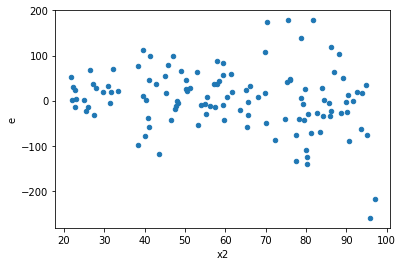

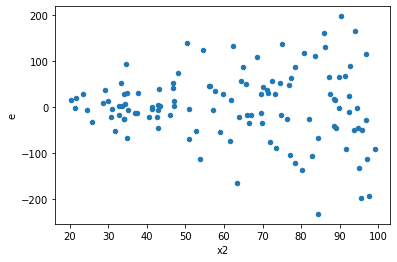

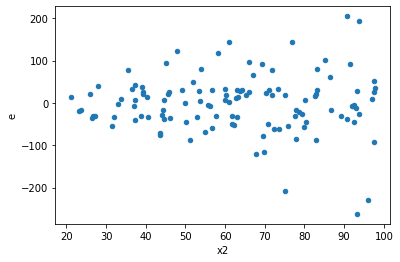

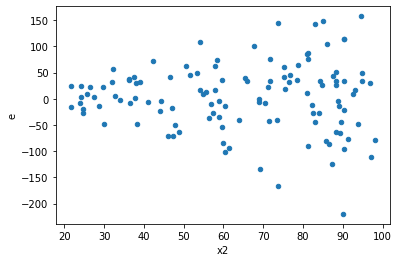

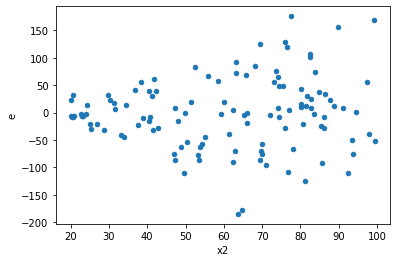

In [17]:
tablenew0 = table.loc[1.0]
tablenew1 = table.loc[4.0]
tablenew2 = table.loc[5.0]
tablenew3 = table.loc[6.0]
tablenew4 = table.loc[7.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,46.0,46.0,118829.85672926283,248374.4972511425,2583.2577549839743,5399.445592416141,2.090169121528346,0.013917245873101836,0.9930413770634491,0.006958622936550918,Reject001=1 : Homoscedasticity
1.0,46.0,46.0,129627.85196153089,307439.5172911312,2817.9967817724105,6683.467767198505,2.371708800531299,0.004110443603591696,0.9979447781982042,0.002055221801795848,Reject001=0 : Heteroscedasticity
2.0,46.0,46.0,125766.1454005611,205510.84177929815,2734.0466391426326,4467.626995202134,1.6340712448867125,0.09932714723688063,0.9503364263815597,0.049663573618440315,Reject001=1 : Homoscedasticity
3.0,46.0,46.0,101494.36704330619,181054.43633932094,2206.3992835501344,3935.966007376542,1.7838865506897306,0.05251965120253588,0.9737401743987321,0.02625982560126794,Reject001=1 : Homoscedasticity
4.0,46.0,46.0,141251.33092737716,383083.1901079406,3070.681107116895,8327.895437129144,2.712067826850415,0.0009692609792044671,0.9995153695103978,0.00048463048960223354,Reject001=0 : Heteroscedasticity
5.0,46.0,46.0,101676.50184929068,284784.1170374071,2210.3587358541454,6190.959066030589,2.800884293398749,0.0006698062764072255,0.9996650968617964,0.0003349031382036127,Reject001=0 : Heteroscedasticity
6.0,46.0,46.0,101573.26813382187,247864.81506784688,2208.1145246483015,5388.365544953193,2.4402563747509554,0.0030627983224549293,0.9984686008387725,0.0015313991612274647,Reject001=0 : Heteroscedasticity
7.0,46.0,46.0,90797.4395167503,203120.8150211064,1973.8573807989194,4415.669891763182,2.2370764649551016,0.00735207320193787,0.9963239633990311,0.003676036600968935,Reject001=0 : Heteroscedasticity
8.0,46.0,46.0,56870.554262334685,303234.0689373334,1236.3163970072758,6592.044976898553,5.332004811111276,8.284398522739878e-08,0.9999999585780074,4.142199261369939e-08,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,118829.85672926283,248374.4972511425,2583.2577549839743,5399.445592416141,2.090169121528346,0.013917245873101836,Reject001=1 : Homoscedasticity
1.0,46.0,46.0,129627.85196153089,307439.5172911312,2817.9967817724105,6683.467767198505,2.371708800531299,0.004110443603591696,Reject001=0 : Heteroscedasticity
2.0,46.0,46.0,125766.1454005611,205510.84177929815,2734.0466391426326,4467.626995202134,1.6340712448867125,0.09932714723688063,Reject001=1 : Homoscedasticity
3.0,46.0,46.0,101494.36704330619,181054.43633932094,2206.3992835501344,3935.966007376542,1.7838865506897306,0.05251965120253588,Reject001=1 : Homoscedasticity
4.0,46.0,46.0,141251.33092737716,383083.1901079406,3070.681107116895,8327.895437129144,2.712067826850415,0.0009692609792044671,Reject001=0 : Heteroscedasticity
5.0,46.0,46.0,101676.50184929068,284784.1170374071,2210.3587358541454,6190.959066030589,2.800884293398749,0.0006698062764072255,Reject001=0 : Heteroscedasticity
6.0,46.0,46.0,101573.26813382187,247864.81506784688,2208.1145246483015,5388.365544953193,2.4402563747509554,0.0030627983224549293,Reject001=0 : Heteroscedasticity
7.0,46.0,46.0,90797.4395167503,203120.8150211064,1973.8573807989194,4415.669891763182,2.2370764649551016,0.00735207320193787,Reject001=0 : Heteroscedasticity
8.0,46.0,46.0,56870.554262334685,303234.0689373334,1236.3163970072758,6592.044976898553,5.332004811111276,8.284398522739878e-08,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    682
Reject001=1 : Homoscedasticity      318
Name: Result_test, dtype: int64